### Apply_kwargs()
It's an auxiliary function to apply common modifications to each plot in QuickVega. Here are a list of possible attirbutes (I'm trying to use similar notation to Plots.jl):
* color    - specify a single color for the whole plot (e.g color = "blue");
* color_scheme  - specify a color scheme;
* zcolor   - this is for assigning a variable to color (e.g color = randn(100));
* size     - this is for assigning a variable to size  (e.g size  = randn(100));
* shape    - this is for assigning a variable to size  (e.g size  = randn(100));
* opacity  - use a variable to be the opacity of the plot;
* strokedash - use a variable to be the opacity of the plot;
* palette  - choose a color scheme;
* width
* height
* stroke   - true or false for the line across the image;
* marktype 
* marksize 
* markopacity 
* markstroke 
* markstrokewidth
* title
* xlabel
* ylabel
* xlim
* ylim
* legend
* orient
* order
* grid
* gridx    - grid vertical true or false;
* gridy    - grid horizontal true or false;
* xscale   - example, allow log scale;
* yscale
* interactive - true or false, to enable zoom and panning;
* tooltip


Implement a Cheat_Sheet for the possible parameters;

In [134]:
using Revise, Pkg
Pkg.activate("../.")
using QuickVega, DataFrames, VegaLite, VegaDatasets
using Distributions, KernelDensity
using Contour
using Setfield
using VegaDatasets
using DataStructures
using DataTables

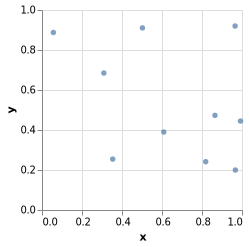

In [135]:
# vlplot(:circle, x=rand(10),y=rand(10),color=(field=rand(10),type="ordinal",scale=(scheme="plasma",)))
df = DataFrame(x=rand(10),y=rand(10),c=rand(10))
# vlplot(data=df,:circle, x=:x,y=:y,color=(field=:c,type="quantitative",scale=(scheme="category20b")))
p = @vlplot(data=df,:circle,:x,:y,color={field=:c,scale={scheme="plasma"}})
p = @vlplot(data=df,:circle,:x,:y)

In [132]:
p.params["encoding"]["color"] = OrderedDict{String,Any}("scale"=>OrderedDict{String,Any}("scheme"=>"plasma"))

OrderedDict{String, Any} with 1 entry:
  "scale" => OrderedDict{String, Any}("scheme"=>"plasma")

WARN Dropping {"scale":{"scheme":"plasma"}} from channel "color" since it does not contain any data field, datum, value, or signal.
WARN Dropping {"scale":{"scheme":"plasma"}} from channel "color" since it does not contain any data field, datum, value, or signal.


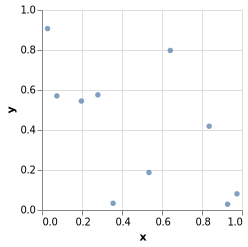

In [133]:
p

In [131]:
p.params["encoding"]["color"]["scale"] = OrderedDict{String,Any}("scheme"=>"plasma") 

LoadError: KeyError: key "color" not found

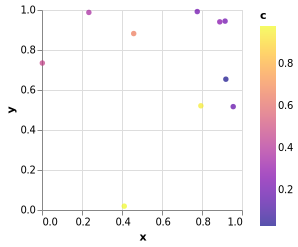

In [128]:
p

In [50]:
function test(;kwargs...)
    print(kwargs)
    for (key,value) in kwargs
        print(key)
    end
    return Dict(kwargs)
end

test (generic function with 2 methods)

In [51]:
function test2(;kwargs...)
    for kwarg in kwargs
        test(kwarg)
    end
end

test2 (generic function with 1 method)

In [52]:
t=test(o="ok")

Base.Iterators.Pairs(:o => "ok")o

Dict{Symbol, String} with 1 entry:
  :o => "ok"

In [53]:
t

Dict{Symbol, String} with 1 entry:
  :o => "ok"

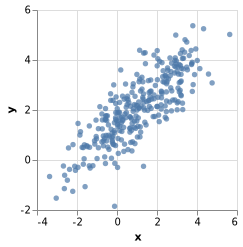

In [74]:
μ = [1.0,2.0]
Σ = [3.0 2.0;
     2.0 2.0]
d = Distributions.MultivariateNormal(μ,Σ)
samples = rand(d,300)';
data = DataTables.DataTable(x=samples[:,1],y=samples[:,2])
p = QuickVega.scatterplot(samples)

In [75]:
# @set p.params
p.params["encoding"]["color"] = OrderedDict{String,Any}("value"=>"red")

OrderedDict{String, Any} with 1 entry:
  "value" => "red"

In [76]:
p.params["encoding"]

OrderedDict{String, Any} with 3 entries:
  "x"     => OrderedDict{String, Any}("field"=>"x")
  "y"     => OrderedDict{String, Any}("field"=>"y")
  "color" => OrderedDict{String, Any}("value"=>"red")

In [80]:
append!(p.params["encoding"]["color"],OrderedDict{String,Any}("scale"=>"red")

OrderedDict{String, Any} with 3 entries:
  "mark"     => :circle
  "encoding" => OrderedDict{String, Any}("x"=>OrderedDict{String, Any}("field"=…
  "data"     => OrderedDict{String, Any}("values"=>DataValuesNode(OrderedDict{S…

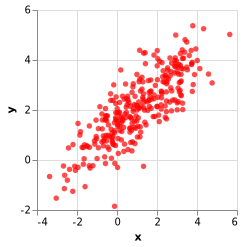

In [78]:
p

In [43]:
# v = KernelDensity.kde(samples);
# p = QuickVega.scatterplot(samples)
# @vlplot() + p + contourplot(v.x,v.y,v.density,6)

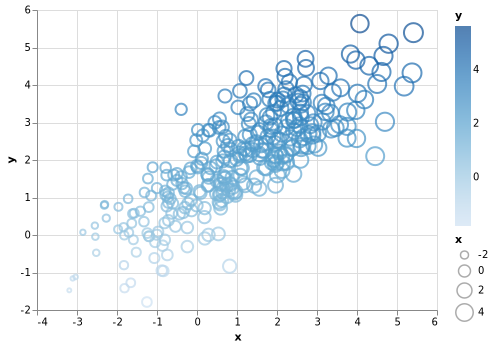

In [44]:
xp = vlfrag(field=:x,type=:q)
sp = vlfrag(field=:x,type=:q)
d = vlfrag()
vlplot(data=data, mark=:point,x=xp,y=:y,width=400,height=300,size=sp,color=:y)
# vlplot(mark=:point,x=randn(100),y=randn(100),width=400,height=300,color=rand(100),size=randn(100))
# vlplot(p)
